# Memento Nettoyer et analyser les données

## Vocabulaire

- <u>Individus</u> : Unité d'observation (ligne du dataset : clients, personne, animaux, mesures physique...)
- <u>Variables</u> : Caractéristiques des <b>individus</b>
- <u>Population</u> : Ensemble des <b>individus</b>. Sa taille est noté <b>N</b>.
- <u>Echantillon</u> : Fraction d'<b>individus</b> sélectionnés d'une <b>population</b>. Sa taille est noté <b>n</b>
- <u>Jeu de données</u> : Ensemble des informations récoltées sur les <b>individus</b> de l'<b>échantillon</b>, présenté sous forme de tableau. Un ligne est un <b>individu</b>, une colonne est une <b>variable</b>.
- <u>Statistiques</u> : Fait d'observer et de décrire objectivement un phénomère passé.
- <u>Probabilités</u> : Fait de modéliser, essayer de comprendre les risques ou chances qu'un évènement se produise.
- <u>Statistiques descriptives</u> : Présenter, décrire et résumer le jeu de données à l'aide de graphique et de mesures (moyenne, écart-type...) sur une ou deux variables.
- <u>Statistiques multidimensionnelle</u> : Appelée Analyse Exploratoire de Données - AED, c'est l'étude la relation entre 3 variables ou plus.
- <u>Statistiques inférentielles</u> : Analyser les données d'un sous ensemble d'une population pour en déduire les caractérisques globales de la population.
- <u>Modélisation statistique</u> : Observer les variables d'un échantillon, et ensuite de formaliser les observations par des règles mathématiques (modèle probalistique) dans le but d'en faire des prédictions.
- <u>Imputation</u> : Consiste à deviner une valeur manquante.
- <u>Amputation</u> : Le fait de supprimer les individus avec les valeurs manquantes.
- <u>Outlier aberrante</u> : Valeur manifestement fausse
- <u>Outlier atypique</u> : Valeur qui sort du lot mais pas forcément fausse.
- <u>Biais</u> : Le fait de modifier, supprimer des valeurs, individus ou d'effectuer des imputations sur le jeu de données.
- <u>Analyse univariée</u> : Est une analyse effectuée sur une seule variable à la fois.
- <u>Indice statistique</u> : Statistique contruite à partir d'une vision, à partir de connaissance d'un domaine (ex :économie)
- <u>Indicateur statistique</u> : Statistique contruit de façon neutre, construite sans à-priori et sans intention derrière comme une moyenne.

In [241]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
operations = pd.read_csv('./resources/operations.csv')

operations.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


## Les variables

### Variable quantitative

Variable avec une <b>valeur numérique</b> à condition que ces valeurs expriment une quantité et qu'il est possible d'effectuer une opération arithmétique.


Une variable quantitative est soit discrète (valeur précise 1,2,3,4...) , soit continue (variable float ).

### Variable qualitative

Variable avec une valeur qui représente une <b>modalité</b> (catégorie).

Une variable est dite <b>ordinale</b>, si ses modalités peuvent être ordonées. A l'inverse elle est dite <b>nominale</b> 

### Variable dichotomique

Variable qualitative qui ne prend que deux modalités (0/1, true/false). Aussi appelée variable binaire, booléenne.



## Type d'erreurs

- Valeur manquante : Cellule vide.
- Erreur lexicale : La cellule attend un nom mais possède un chiffre.
- Erreur d'irrégularité : La cellule attend une valeur en cm mais elle possède une valeur en mètre.
- Erreur de formatage : La cellule ne possède pas le bon format de date par exemple.
- Doublon : Présence de plus d'une fois d'un individu.
- Outlier : Valeur abérente/atypique d'une variable, par exemple avoir une taille de 3.5 pour une femme.



In [242]:
data = pd.read_csv('./resources/personnes.csv')
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,24,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


## Détecter les erreurs

In [243]:
# Les valeurs manquantes
print(data.isnull())

   prenom  email  date_naissance   pays  taille
0   False  False           False  False   False
1   False  False           False   True   False
2   False  False           False  False   False
3   False  False           False  False   False
4   False  False           False  False   False
5   False  False           False  False   False
6   False  False            True  False   False


In [244]:
# Le nombre de valeur manquante par variable
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [245]:
## Les doublons - Dans le cas où l'identifiant des personnes est l'adresse email
print(data.loc[ data['email'].duplicated(keep=False), : ])

   prenom                   email date_naissance   pays taille
1  Samuel  samuel_329@example.com     20/09/2001    NaN  1.67m
6  samuël  samuel_329@example.com            NaN  Bénin  1.45m


In [246]:
# Traitement des pays inconnus
VALID_COUNTRIES = [ 'France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne', 'USA' ]

# Tous les pays qui ne sont pas dans la liste des pays VALID_COUNTRIES ( ~ tilde utilisé pour la négation ) 
mask = ~data['pays'].isin(VALID_COUNTRIES)
# On vérifie que l'on a bien le masque d'appliqué
data.loc[mask, 'pays']

1    NaN
5     24
Name: pays, dtype: object

In [247]:
# On modifie les valeurs erronées par une valeur inconnue
data.loc[mask, 'pays'] = np.NaN
data['pays']

0           France
1              NaN
2    Côte d'ivoire
3           France
4       Madagascar
5              NaN
6            Bénin
Name: pays, dtype: object

In [248]:
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,"marco23@example.com, mc23@supermail.eu",10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [249]:
# Le cas des deux emails pour un individu
# On utlise la méthode split sur la variable email du df avec le paramètre expand=True
# afin d'obtenir une tableau à deux dimensions.
data['email'].str.split(',', expand=True)

,0,1
0,leila@example.com,None
1,samuel_329@example.com,None
2,choupipoune@supermail.eu,None
3,marco23@example.com,mc23@supermail.eu
4,helloworld@supermail.eu,None
5,hanna2019@supermail.eu,None
6,samuel_329@example.com,None


In [250]:
# Ici on modifie la colonne email avec la première adresse email de chaque individu
data['email'] = data['email'].str.split(',', expand=True)[0]
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,marco23@example.com,10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [251]:
# Vu que pour les tailles toutes la valeurs se terminent par m on va retirer ds un premier temps le dernier caractère.
data_tmp = data.copy()
data_tmp['taille'] = data_tmp['taille'].str[:-1]
data_tmp

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153c
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [252]:
# Ensuite on effectue une convertion numérique aux valeurs et si la convertion est impossible alors on set une valeur par défaut NaN
# Ici 153c va être converti en Nan vu qu'il n'est pas possible de convertir une chaîne alphanumeric en numeric
data_tmp['taille'] = pd.to_numeric(data_tmp['taille'], errors='coerce')
data_tmp

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,NaN
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [253]:
# Et ensuite on affecte les valeurs manquante de taille par une valeur moyenne
data_tmp.loc[ data_tmp['taille'].isnull(), 'taille' ] = round(data_tmp['taille'].mean(), 2)
data_tmp

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.84
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [254]:
# Mais en ayant une valeur outlier pour Hanna au niveau de la taille, la moyenne appliqué à la taille de Radia ne reflète pas la réalité
# En effet à la base on avait 153cm et mainteant on a 1.84m
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49m
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,153cm
3,Marc,marco23@example.com,10/02/1978,France,1.65m
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34m
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [255]:
# Dans le cas où notre jeu de données actuel ne possède que l'unité cm et m
# La variable value correspond à la valeur de la cellule
def convert_cm_to_m(value):
    # Si l'unité est le cm alors on effectue la convertion
    if value[-2:] == 'cm':
        return str( int(value[:-2]) / 100)
    #sinon on retourne la valeur numérique sans l'unité
    else:
        return value[:-1]

# On applique uniquement sur la colonne taille la fonction de convertion cm en m
data['taille'] = data['taille'].apply(convert_cm_to_m)
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,23/01/1990,France,1.49
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67
2,Radia,choupipoune@supermail.eu,12 sept. 1984,Côte d'ivoire,1.53
3,Marc,marco23@example.com,10/02/1978,France,1.65
4,Heri,helloworld@supermail.eu,05/03/2008,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,01/01/1970,NaN,3.45
6,samuël,samuel_329@example.com,NaN,Bénin,1.45


In [256]:
# Pour la date on unifie les formats
# Sinon on fonction de l'importance de la donnée on devrait écrire une fonction de convertion
data['date_naissance'] = pd.to_datetime( data['date_naissance'], format="%d/%m/%Y", errors='coerce')
data

,prenom,email,date_naissance,pays,taille
0,Leila,leila@example.com,1990-01-23,France,1.49
1,Samuel,samuel_329@example.com,2001-09-20,NaN,1.67
2,Radia,choupipoune@supermail.eu,NaT,Côte d'ivoire,1.53
3,Marc,marco23@example.com,1978-02-10,France,1.65
4,Heri,helloworld@supermail.eu,2008-03-05,Madagascar,1.34
5,Hanna,hanna2019@supermail.eu,1970-01-01,NaN,3.45
6,samuël,samuel_329@example.com,NaT,Bénin,1.45


In [257]:
data = pd.read_csv('./resources/operations-cleaned.csv')
data

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
303,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
304,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
305,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
306,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


## Distribuation empirique

La distribution empirique d'une variable, c'est l’ensemble des valeurs (ou modalités) prises par cette variable, ainsi que leurs effectifs / fréquences associés.

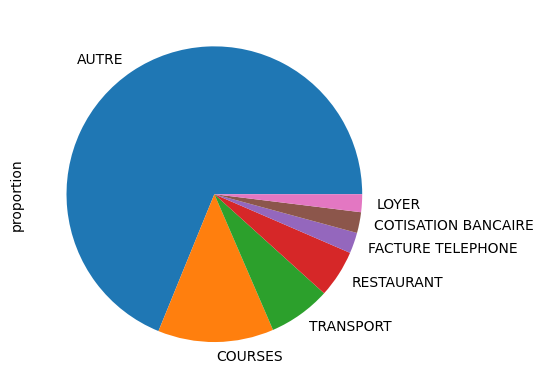

In [258]:
# Pour obtenir un tableau numéric du nombre de fois qu'apparaît une valeur dans la colonne (effectif de la variable) on utilise 
# la méthode .value_counts(), pour obtenir la fréquence on utilise le paramètre normalize = True
data['categ'].value_counts(normalize=True).plot(kind="pie")
plt.show()

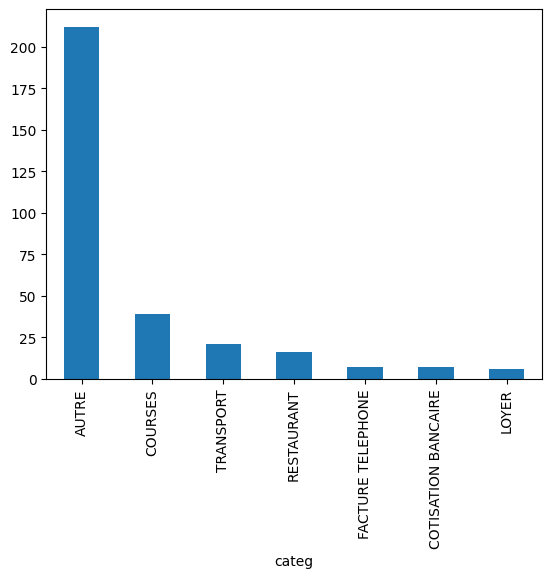

In [259]:
data['categ'].value_counts(normalize=False).plot(kind="bar")
plt.show()


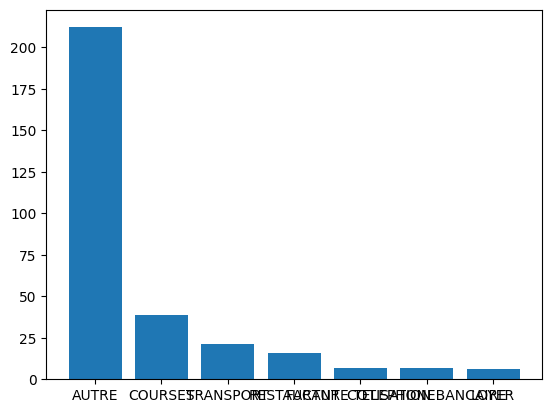

In [260]:
# La version native avec plt.bar()
t = data['categ'].value_counts(normalize=False).reset_index()

plt.bar(height=t['count'], x=t['categ'])
plt.show()

Il est clair qu'il est plus simple d'utiliser la méthode .plot() sur une variable pour en avoir une représentation graphique.

### Variable quantitative

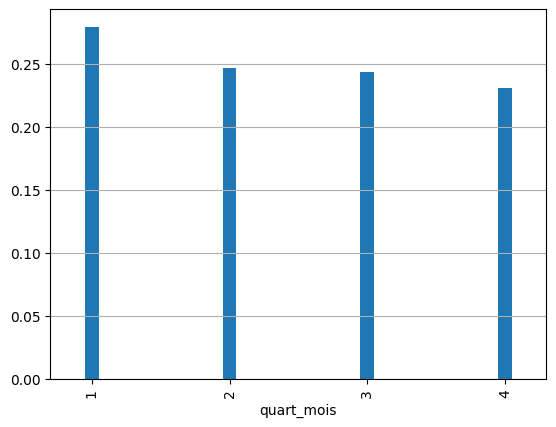

In [268]:
# On crée un nouvelle variable pour indiqué l'avancée dans le mois
data['date_operation'] = pd.to_datetime(data['date_operation'], errors='coerce')
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

# Diagramme en bâtons fin pour les variables discrètes (valeur précise)
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.grid(axis="y")
plt.show()

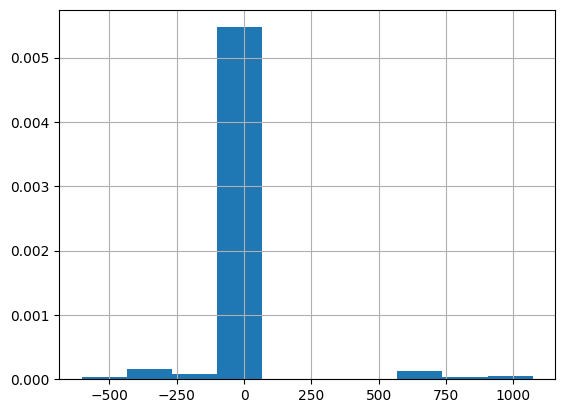

In [283]:
# Représente une variable continue (float compris dans un intervalle)
# Ici on agrège les valeurs en classes. Il y a une classe importante de montant autour de zero. Grosso modo [-80:80]
data['montant'].hist(density=True)
plt.show()

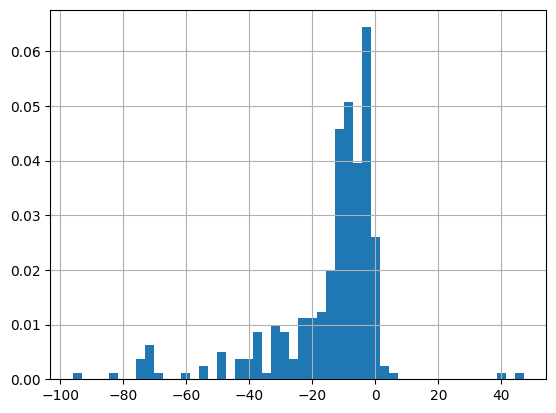

In [282]:
# On affine le graphique en montrant que les montants inférieur à un débit/crédit de 100
# bins correspond au nombre de classe que l'on souhaite avoir
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=50)
plt.show()

In [285]:
# présentation sous forme de tableau de la distribution empirique d'une variable

effectifs = data['categ'].value_counts()
effectifs

categ
AUTRE                  212
COURSES                 39
TRANSPORT               21
RESTAURANT              16
FACTURE TELEPHONE        7
COTISATION BANCAIRE      7
LOYER                    6
Name: count, dtype: int64

In [288]:
modalites = effectifs.index
modalites

Index(['AUTRE', 'COURSES', 'TRANSPORT', 'RESTAURANT', 'FACTURE TELEPHONE',
       'COTISATION BANCAIRE', 'LOYER'],
      dtype='object', name='categ')

In [298]:
# On initialise notre df avec les modalités
tab = pd.DataFrame(modalites, columns=['categ'])
tab

,categ
0,AUTRE
1,COURSES
2,TRANSPORT
3,RESTAURANT
4,FACTURE TELEPHONE
5,COTISATION BANCAIRE
6,LOYER


In [297]:
# On récupère la valeur de l'effectif pour chaque catégorie
tab['n'] = effectifs.values
tab

,categ,n,f,F
0,AUTRE,212,0.688312,0.688312
5,COTISATION BANCAIRE,39,0.022727,0.711039
1,COURSES,21,0.126623,0.837662
4,FACTURE TELEPHONE,16,0.022727,0.860390
6,LOYER,7,0.019481,0.879870
3,RESTAURANT,7,0.051948,0.931818
2,TRANSPORT,6,0.068182,1.000000


In [296]:
# On calcule la fréquence nombre d'occurence / le nombre total d'enregistrement
tab['f'] = tab['n'] / len(data)
tab

,categ,n,f,F
0,AUTRE,212,0.688312,0.688312
5,COTISATION BANCAIRE,7,0.022727,0.711039
1,COURSES,39,0.126623,0.837662
4,FACTURE TELEPHONE,7,0.022727,0.860390
6,LOYER,6,0.019481,0.879870
3,RESTAURANT,16,0.051948,0.931818
2,TRANSPORT,21,0.068182,1.000000


In [295]:
# On calcule la fréquence cumulé
tab = tab.sort_values('categ')
tab['F'] = tab['f'].cumsum()
tab

,categ,n,f,F
0,AUTRE,212,0.688312,0.688312
5,COTISATION BANCAIRE,7,0.022727,0.711039
1,COURSES,39,0.126623,0.837662
4,FACTURE TELEPHONE,7,0.022727,0.860390
6,LOYER,6,0.019481,0.879870
3,RESTAURANT,16,0.051948,0.931818
2,TRANSPORT,21,0.068182,1.000000


## Mesure de tendance centrale